# TASK 1: Exploratory Data Analysis (EDA)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import davies_bouldin_score

In [27]:

transactions_df = pd.read_csv("Transactions.csv")
products_df = pd.read_csv("Products.csv")
customers_df = pd.read_csv("Customers.csv")

transactions_df["TransactionDate"] = pd.to_datetime(transactions_df["TransactionDate"])
customers_df["SignupDate"] = pd.to_datetime(customers_df["SignupDate"])

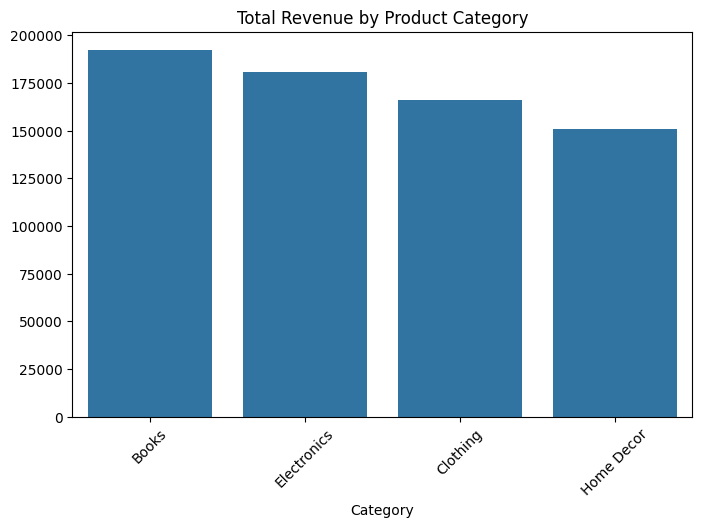

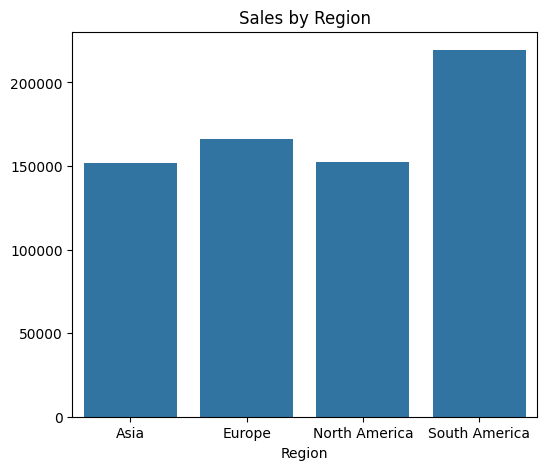

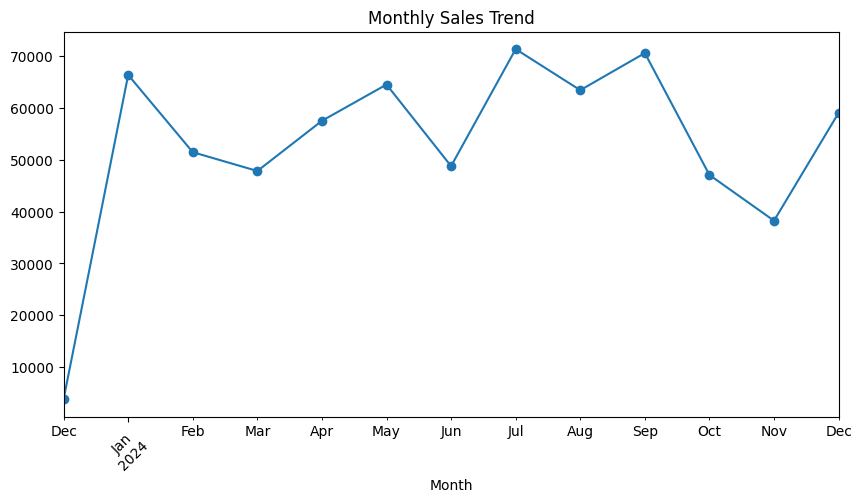

In [28]:
merged_df = transactions_df.merge(products_df, on="ProductID").merge(customers_df, on="CustomerID")

category_revenue = merged_df.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.title("Total Revenue by Product Category")
plt.xticks(rotation=45)
plt.show()

regional_sales = merged_df.groupby("Region")["TotalValue"].sum()
plt.figure(figsize=(6,5))
sns.barplot(x=regional_sales.index, y=regional_sales.values)
plt.title("Sales by Region")
plt.show()

transactions_df["Month"] = transactions_df["TransactionDate"].dt.to_period("M")
monthly_sales = transactions_df.groupby("Month")["TotalValue"].sum()
plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()


### Jai Kumar